#                                      Multi-Tap Filter

###### In audio processing, a multi-tap filter is a type of digital filter that has several "taps." Each of these taps produces an output by delaying the input signal by different amounts. You can then adjust the strength of each delayed output by multiplying it with a specific value, known as a coefficient. By combining these weighted outputs, you get the final sound from the filter. This technique is commonly used in creating audio effects like reverb and delay.

###### Below are the different components of a Multi-Tap Filter

###### 1. Delay Line: This is the fundamental component of a multi-tap filter. It stores samples for a certain duration, allowing for different delayed versions of the input signal to be accessed at each tap.

###### 2. Taps: Points along the delay line where the signal is 'tapped off'. Each tap extracts a delayed version of the input.

###### 3. Weights/Coefficients: Each tap will usually have an associated weight or coefficient. By adjusting these, you can control the amplitude of the signal from each tap, effectively shaping the filter's response.

###### 4. Summing Junction: After each delayed signal is multiplied by its coefficient, they are summed together to produce the filter's output.

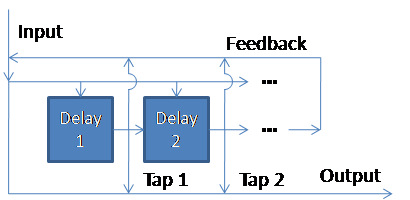

### 1. Reading an audio file and selecting only the mono channel for processing

In [2]:
import soundfile as sf
import numpy as np
from IPython.display import Audio, display
import librosa

s, fs = sf.read('Female Vox.wav')
og_sound = Audio(x, rate = fs)
display (og_sound)


N = len(s)  



# Extracting only one channel in case the audio file is stereo
if len(s.shape) == 2:
    s = s[:, 0]



### 2. Initializing the main parameters for the Multi-Tap Delay:

######                <blockquote>                              i) D1, D2 : Delay times in samples

######       <blockquote>                                       ii) b0, b1, b2: feedforward coefficients

###### <blockquote>                                            iii) a1, a2: feedback coefficients

######   <blockquote>                                         iv) Initializing buffers and lists for output signal

In [3]:
D1, D2 = int(0.25*fs), int(0.125*fs) # delay of samples based on delayed times
b0 = b1 = b2 = 1 #feedback coefficients
a1, a2 = 0.2, 0.4 #feedforward coefficients

# Delay pipeline
w = [0]*(D1 + D2 + 1)


q = 0

tap1 = D1
tap2 = D1 + D2

# Empty list for output
y = []


### 3. Multi-Tap Delay algorithm

In [4]:
for n in range(N):
    s1 = w[tap1] #point in the delay line for tap1
    s2 = w[tap2] #point in the delay line for tap2
    y.append(b0*s[n] + b1*s1 + b2*s2)
    w[q] = s[n] + a1*s1 + a2*s2 
    q = q - 1              # Going back (index)
    if q < 0:           # Circulate index for buffer
        q = D1 + D2
    tap1 = tap1 - 1           # Backshift tap1
    if tap1 < 0:        # Circulate tap1
        tap1 = D1 +D2
    tap2 -= 1
    if tap2 < 0:        # Backshift tap2
        tap2 = D1 + D2  # Circulate tap2


y = np.array(y)

y = y/np.max(np.abs(y))


delay_audio = Audio(y, rate = fs)
display (delay_audio)
